In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split # Dividir nossos dados em Treino e teste
from sklearn.ensemble import RandomForestClassifier # Algoritmo de Classificação
from sklearn.preprocessing import LabelEncoder # transforma Categorias em Números
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import sklearn.tree as plot_tree
import graphviz

base = pd.read_csv('insurance.csv') # caractereristicas de pessoas que solicitam seguro
base = base.drop(columns=['Unnamed: 0'])
base = base.fillna('NaN') # Evita que a coluna recebea NaN
base # Accident é a coluna que vamos prever

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,NaN,Tank,NaN,FamilySedan,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,NaN,Football,NaN,Luxury,Excellent,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,NaN,Football,NaN,FamilySedan,Excellent,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [2]:
y = base.iloc[:,7].values # Accidente é a Variável Dependente e esta na coluna 7
X = base.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values # Independentes

# Vamos transformar os dados categoricos de X em numeros para o algoritmo
labelencoder = LabelEncoder()
for i in range(X.shape[1]): # percorre as colunas das variaveis independentes
  if X[:,i].dtype == 'object': # se for uma variavel categórica, vamos transformar
    X[:,i] = labelencoder.fit_transform(X[:,i])

# Precisamos dividir os dados entre treino e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=1)

In [3]:
# n_estimators é quantas arvores ele vai induzir, o padrão é 100
modelo = RandomForestClassifier(n_estimators=100, max_depth=18, max_leaf_nodes=12)
modelo.fit(X_treinamento, y_treinamento)

RandomForestClassifier(max_depth=18, max_leaf_nodes=12)

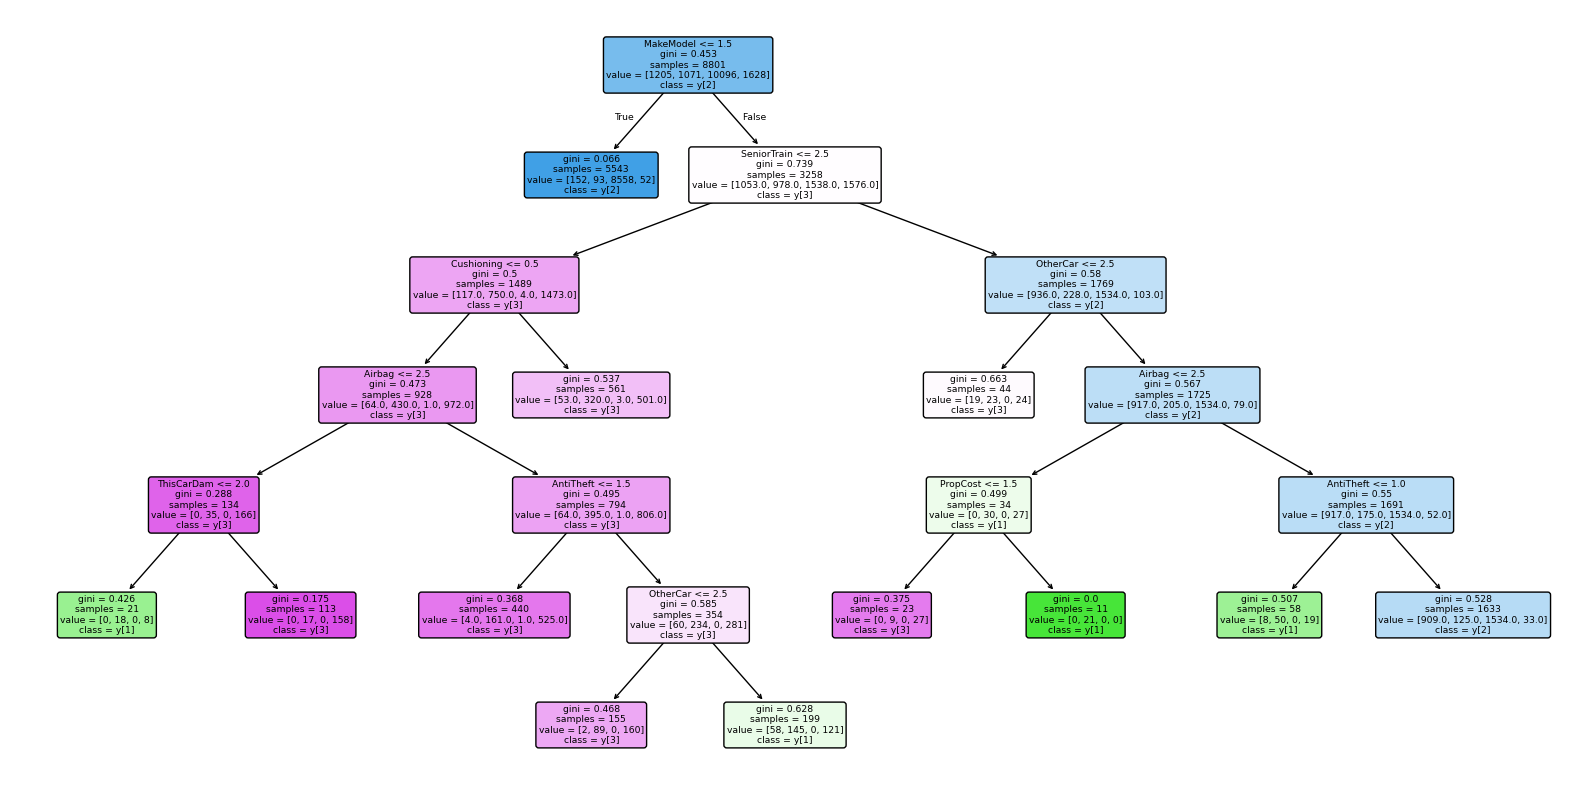

In [4]:

tree_index = 0
tree_to_visualize = modelo.estimators_[tree_index]
plt.figure(figsize=(20,10))
plot_tree.plot_tree(tree_to_visualize, feature_names=base.columns[:-1], class_names=True,
                    filled=True, rounded=True)
plt.show()

In [5]:
previsoes = modelo.predict(X_teste) # Previsões do modelo
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average='weighted')
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')
report = classification_report(y_teste, previsoes)
print('Acurácia: ', accuracy)
print('Precisão: ', precision)
print('Recall: ', recall)
print('F1: ', f1)
print(report)

Acurácia:  0.9258333333333333
Precisão:  0.9223683590433366
Recall:  0.9258333333333333
F1:  0.9205283472956867
              precision    recall  f1-score   support

        Mild       0.87      0.56      0.68       542
    Moderate       0.76      0.71      0.73       505
         NaN       0.95      1.00      0.98      4228
      Severe       0.89      0.92      0.91       725

    accuracy                           0.93      6000
   macro avg       0.87      0.80      0.82      6000
weighted avg       0.92      0.93      0.92      6000

